<a href="https://colab.research.google.com/github/MonitSharma/Learn-Quantum-Computing-with-Qiskit/blob/main/Quantum_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit
%pip install pylatexenc

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.2 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.44.0-py3-none-any.whl size=7620 sha256=3773fa16b4864f8d93f905ce2b70a1c8e50e00f767f1631edcf1d071760cb58a
  Stored in directory: /root/.cache/pip/wheels/45/90/00/70879ea1304b7b44cde9f737d2a819a87346d62666b3a89de1
Succ

# Quantum Fourier Transform

In this article, we introduce the **quantum fourier transform (QFT)**, derive the circuit, and implement it using Qiskit. We show how to run QFT on a simulator and a five qubit device.

## Introduction

The Fourier transform occurs in many different versions throughout classical computing, in areas ranging from signal processing to data compression to complexity theory. The quantum Fourier transform (QFT) is the quantum implementation of the discrete Fourier transform over the amplitudes of a wavefunction. It is part of many quantum algorithms, most notably Shor's factoring algorithm and quantum phase estimation.


The discrete Fourier transform acts on a vector $(x_0, x_1,...,x_{N-1})$
and maps it to the vector $(y_0,y_1,....,y_{N-1})$
according to the formula


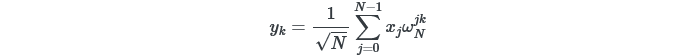

where
Screenshot 2023-08-02 at 13-09-53 Quantum Fourier Transform.png


This can also be expressed as the map:

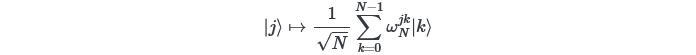

Or the unitary matrix:

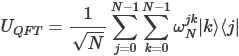

## Intuition

The quantum Fourier transform (QFT) transforms between two bases, the computational (Z) basis, and the Fourier basis. The H-gate is the single-qubit QFT, and it transforms between the Z-basis states $|0⟩$ and $1\rangle$ to the X-basis states $|+⟩$ and $|-⟩$. In the same way, all multi-qubit states in the computational basis have corresponding states in the Fourier basis. The QFT is simply the function that transforms between these bases.

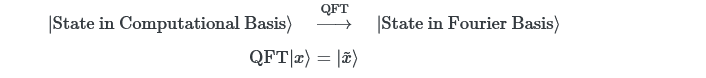

## Counting in the Fourier basis:

In the computational basis, we store numbers in binary using the states $|0\rangle$ and $|1⟩$:

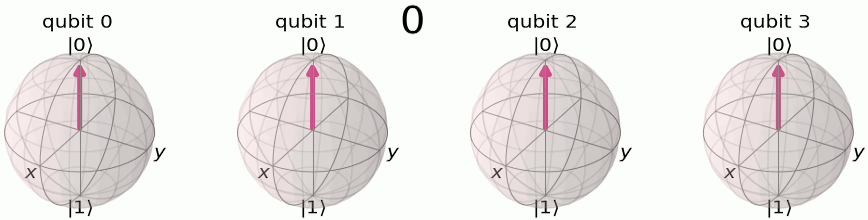

Note the frequency with which the different qubits change; the leftmost qubit flips with every increment in the number, the next with every 2 increments, the third with every 4 increments, and so on. In the Fourier basis, we store numbers using different rotations around the Z-axis:


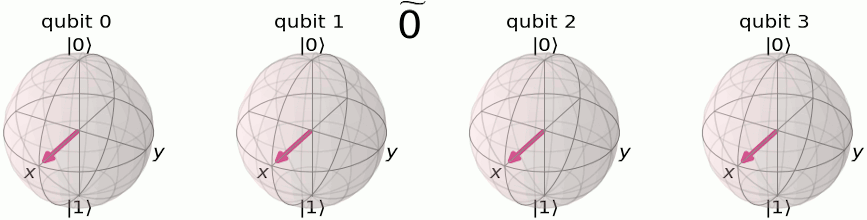


The number we want to store dictates the angle at which each qubit is rotated around the Z-axis. In the state $|\tilde 0\rangle$
, all qubits are in the state $|+\rangle$. As seen in the example above, to encode the state $|\tilde 5\rangle$
on 4 qubits, we rotated the leftmost qubit by $5/16$
full turns (
radians). The next qubit is turned double this ( $10/16 \times 2\pi$
radians, or $10/16$ full turns), this angle is then doubled for the qubit after, and so on.

Again, note the frequency with which each qubit changes. The leftmost qubit (qubit 0) in this case has the lowest frequency, and the rightmost the highest.

# Example 1: 1-qubit QFT


Consider how the QFT operator as defined above acts on a single qubit state $|\psi⟩ = \alpha|0⟩ + \beta |1⟩$. In this case,
$x_0 = \alpha$,
$x_1 = \beta$, and $N=2$. Then,

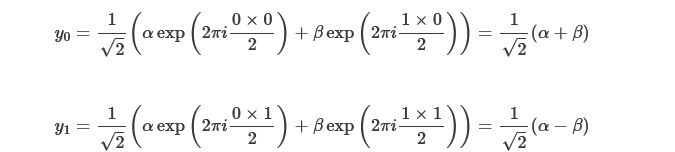

such that the final result is the state

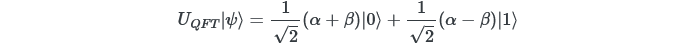


This operation is exactly the result of applying the Hadamard operator (H) on the qubit:

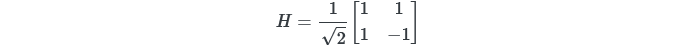

If we apply the H operator to the state $|\psi⟩ = \alpha |0\rangle + \beta |1⟩$, we obtain the new state:

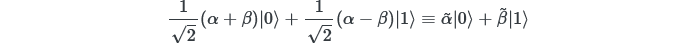


Notice how the Hadamard gate performs the discrete Fourier transform for $N=2$ on the amplitudes of the state.

##  The Quantum Fourier transform

So what does the quantum Fourier transform look like for larger $N$? Let's derive a transformation for $N=2^n$
,QFT
acting on the state $|x⟩ = |x_1,...,x_n⟩$
where $x_1$
is the most significant bit. This maths is here for those that find it useful, if you struggle with it then don’t worry; as long as you understand the intuition in section 2 then you can continue straight to the next section.

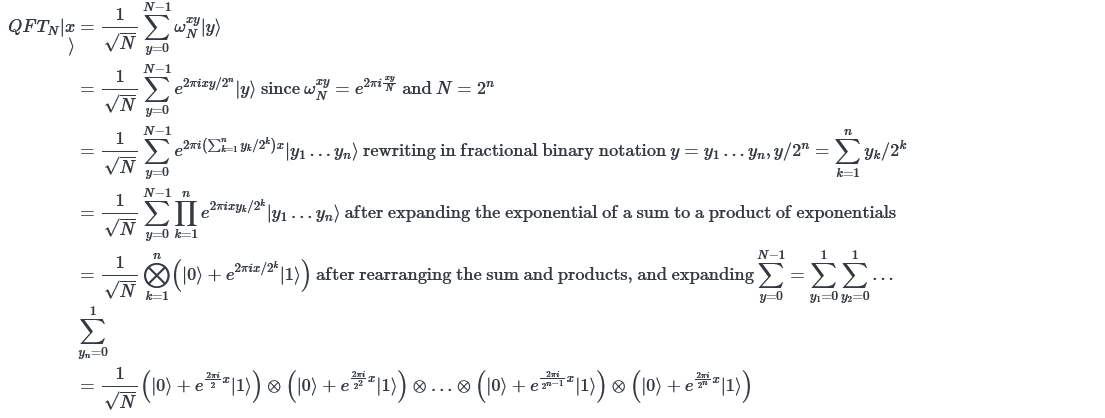

This is a mathematical description of the animation we saw in the intuition section:


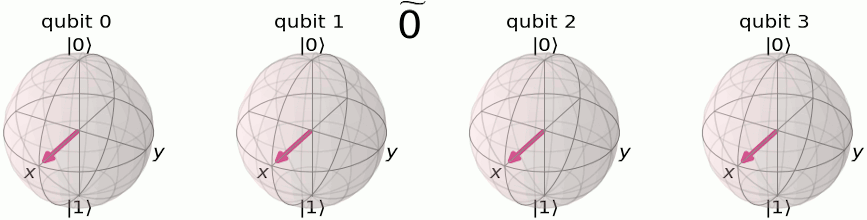

## The Circuit that Implements the QFT

The circuit that implements QFT makes use of two gates. The first one is a single-qubit Hadamard gate,H , that you already know. From the discussion in Example 1 above, you have already seen that the action of H on the single-qubit state $|x_k⟩$
is


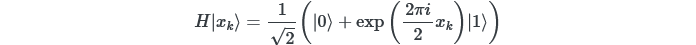

The second is a two-qubit controlled rotation CROT
given in block-diagonal form as

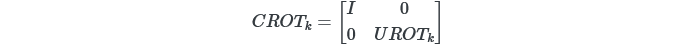


where

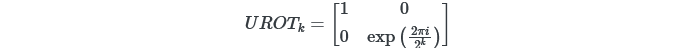

The action of CROT
on a two-qubit state $|x_l x_j⟩$
where the first qubit is the control and the second is the target is given by

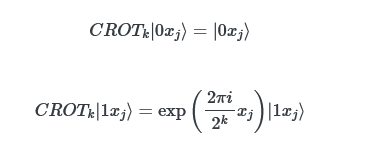


Given these two gates, a circuit that implements an n-qubit QFT is shown below.


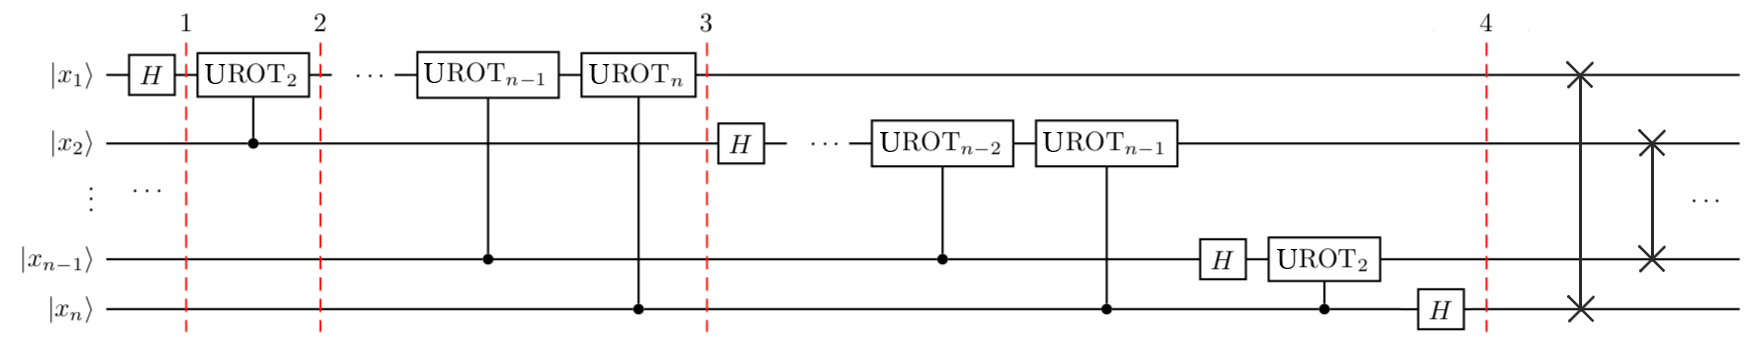

The circuit operates as follows. We start with an n-qubit input state $|x_1, x_2,...x_n⟩$
.

After the first Hadamard gate on qubit 1, the state is transformed from the input state to


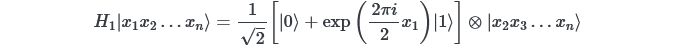

After the $UROT_2$ gate on qubit 1 controlled by qubit 2, the state is transformed to


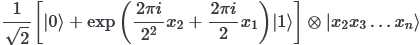

After the application of the last $UROT_n$ gate on qubit 1 controlled by qubit $n$, the state becomes

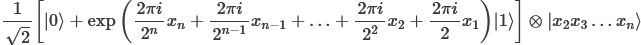


Noting that

Screenshot 2023-08-02 at 13-32-15 Quantum Fourier Transform.png

we can write the above state as

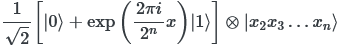

After the application of a similar sequence of gates for qubits $2\ldots n$, we find the final state to be:


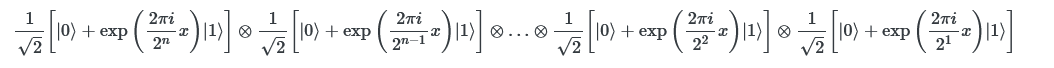

which is exactly the QFT of the input state as derived above with the caveat that the order of the qubits is reversed in the output state.

## Example 2: 3-qubit QFT


The steps to creating the circuit for $|y_3 y_2 y_1⟩ = QFT_8 |x_3x_2x_1⟩$
would be:

Apply a Hadamard gate to $\vert x_1 \rangle$


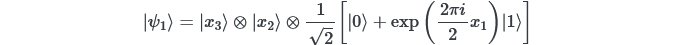

Apply a $UROT_2$ gate to $\vert x_1\rangle$ depending on $\vert x_2\rangle$


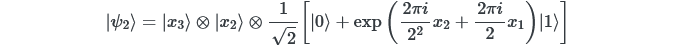

Apply a $UROT_3$ gate to $\vert x_1\rangle$ depending on $\vert x_3\rangle$

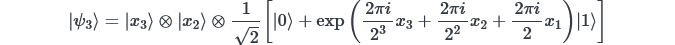

Apply a Hadamard gate to $\vert x_2 \rangle$

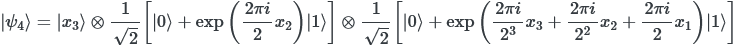

Apply a $UROT_2$ gate to $\vert x_2\rangle$ depending on $\vert x_3\rangle$


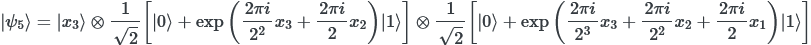

Apply a Hadamard gate to $\vert x_3\rangle$

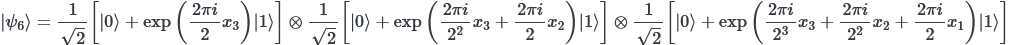

Keep in mind the reverse order of the output state relative to the desired QFT. Therefore, we must reverse the order of the qubits (in this case swap $y_1$ and $y_3$).

## Some Notes About the Form of the QFT Circuit

The example above demonstrates a very useful form of the QFT for
$N= 2^n$. Note that only the last qubit depends on the values of all the other input qubits and each further bit depends less and less on the input qubits. This becomes important in physical implementations of the QFT, where nearest-neighbor couplings are easier to achieve than distant couplings between qubits.

Additionally, as the QFT circuit becomes large, an increasing amount of time is spent doing increasingly slight rotations. It turns out that we can ignore rotations below a certain threshold and still get decent results, this is known as the approximate QFT. This is also important in physical implementations, as reducing the number of operations can greatly reduce decoherence and potential gate errors.

## Qiskit Implementation

In Qiskit, the implementation of the gate used in the discussion above is a controlled phase rotation gate. This gate is defined


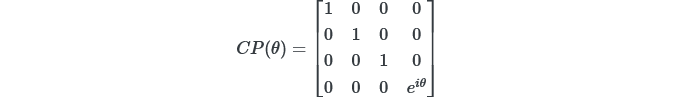

Hence, the mapping from the CROT
gate in the discussion above into the CP gate is found from the equation

Screenshot 2023-08-02 at 13-42-01 Quantum Fourier Transform.png

In [26]:
%pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.3 MB/s eta 0:00:00


In [ ]:
%pip install qiskit-ibmq-provider

Load your IBMQ Account

In [2]:
from qiskit import IBMQ
IBMQ.save_account('ENTER YOUR API TOKEN HERE')

<ipython-input-2-cdf230485926>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('c5a303670922a83ac5699dc2fea334193919a9e2fe6943debde1ac52815df5e39c6a137e05136088f3a7715e8d6dbd10097baf193df1fa22206a85931166946f')


In [8]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

It is useful to work out the relevant code for the 3-qubit case before generalizing to the n-qubit case. First, we must define our quantum circuit:

In [9]:
qc = QuantumCircuit(3)

Note: Remember that Qiskit's least significant bit has the lowest index (0), thus the circuit will be mirrored through the horizontal in relation to the image in previous sections. First, we apply a H-gate to qubit 2 :

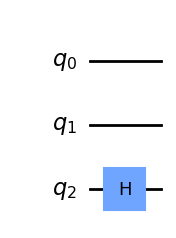

In [10]:
qc.h(2)
qc.draw('mpl')

Next, we want to turn this an extra quarter turn if qubit 1 is in the state $|1⟩$:

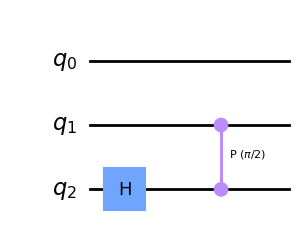

In [11]:
qc.cp(pi/2, 1, 2) # CROT from qubit 1 to qubit 2
qc.draw('mpl')

And another eighth turn if the least significant qubit (0) is $|1⟩$:

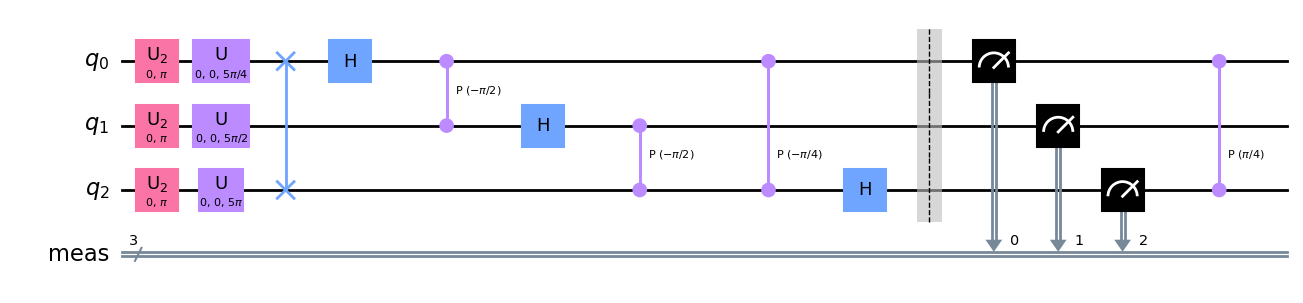

In [37]:
qc.cp(pi/4, 0, 2) # CROT from qubit 2 to qubit 0
qc.draw('mpl')

With that qubit taken care of, we can now ignore it and repeat the process, using the same logic for qubits 0 and 1:

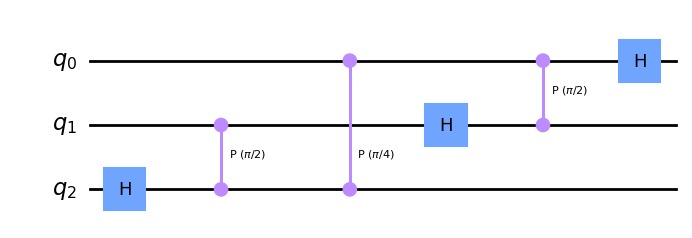

In [13]:
qc.h(1)
qc.cp(pi/2, 0, 1) # CROT from qubit 0 to qubit 1
qc.h(0)
qc.draw('mpl')

Finally we must swap the qubits 0 and 2 to complete the QFT

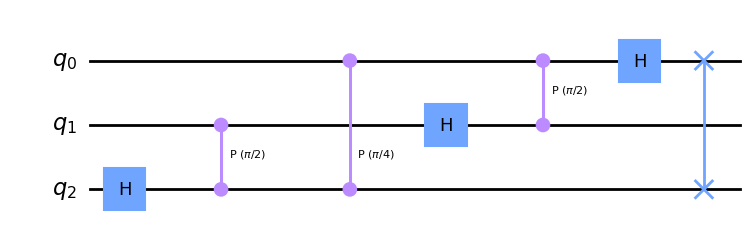

In [14]:
qc.swap(0,2)
qc.draw('mpl')

### General QFT Function

We will now create a general circuit for the QFT in Qiskit. Creating large general circuits like this is really where Qiskit shines.

It is easier to build a circuit that implements the QFT with the qubits upside down, then swap them afterwards; we will start off by creating the function that rotates our qubits correctly. Let’s start as we did with the 3 qubit example, by correctly rotating the most significant qubit (the qubit with the highest index):

In [15]:
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a
        # smaller-angled controlled rotation:
        circuit.cp(pi/2**(n-qubit), qubit, n)

Let’s see how this looks:

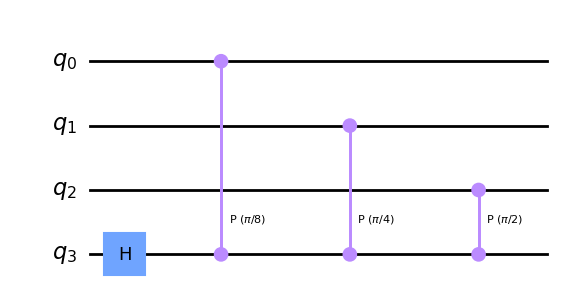

In [16]:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

Great! This is the first part of our QFT. Now we have correctly rotated the most significant qubit, we need to correctly rotate the second most significant qubit. Then we must deal with the third most significant, and so on. But why write more code? When we get to the end of our `qft_rotations()` function, we can use the same code to repeat the process on the next n-1 qubits:

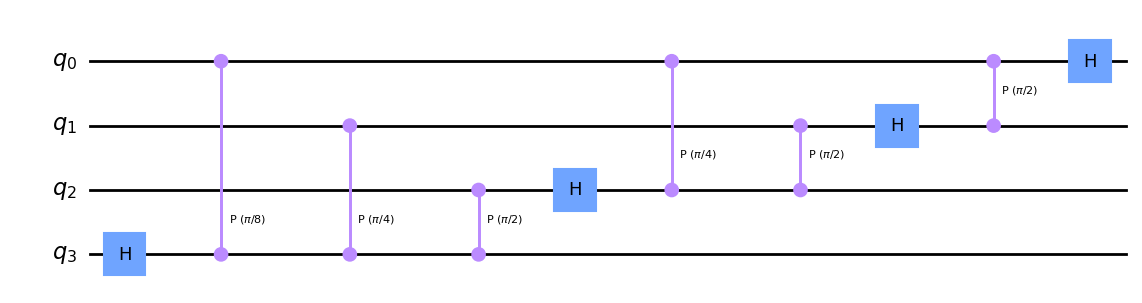

In [18]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

# Let's see how it looks:
qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

Finally, we need to add the swaps at the end of the QFT function to match the definition of the QFT. We will combine this into the final function `qft()`:

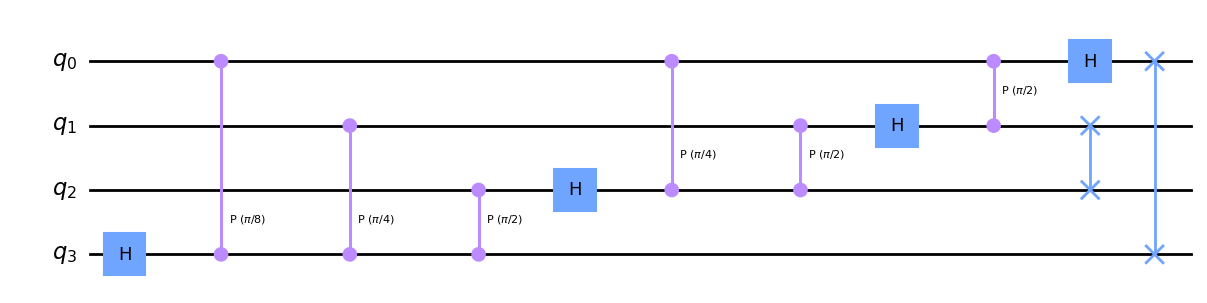

In [21]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

# Let's see how it looks:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

We now want to demonstrate this circuit works correctly. To do this we must first encode a number in the computational basis. We can see the number 5 in binary is 101:

In [22]:
bin(5)

'0b101'

(The 0b just reminds us this is a binary number). Let's encode this into our qubits:

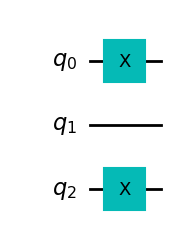

In [24]:
# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(2)
qc.draw('mpl')

And let's check the qubit's states using the aer simulator:

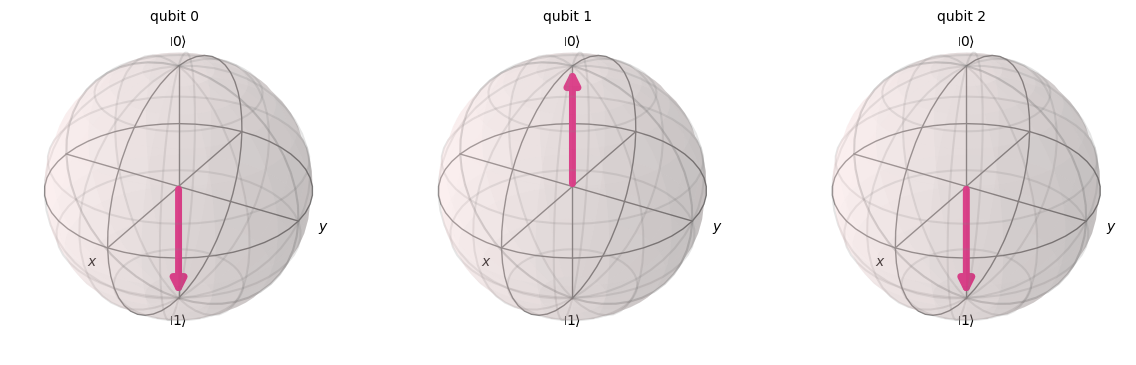

In [27]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Finally, let's use our QFT function and view the final state of our qubits:

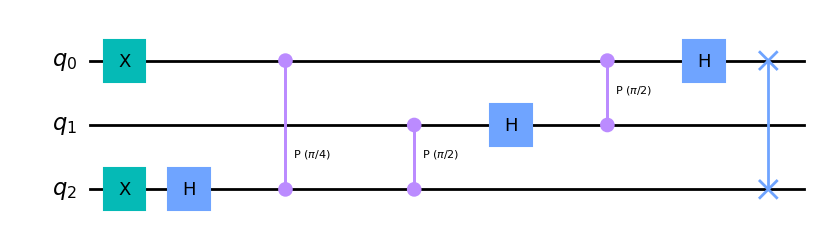

In [28]:
qft(qc,3)
qc.draw('mpl')

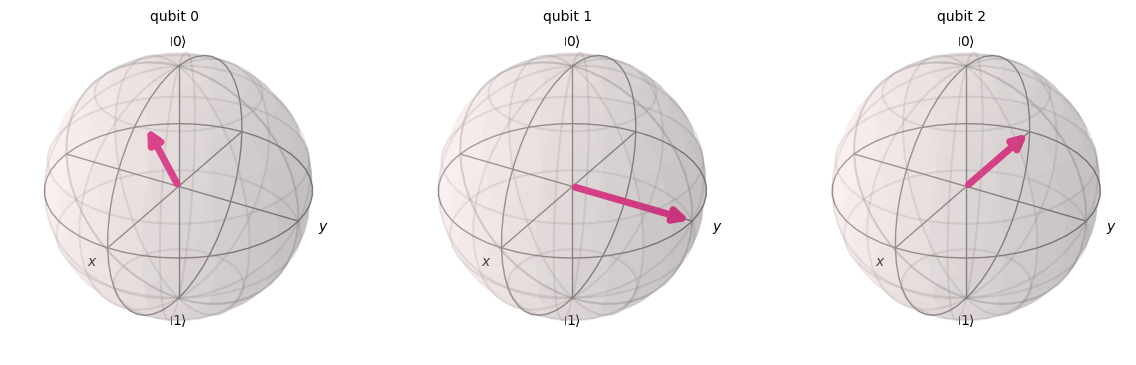

In [29]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

We can see out QFT function has worked correctly. Compared the state $|\tilde 0⟩ = |+++⟩$
, Qubit 0 has been rotated by $5/8$
of a full turn, qubit 1 by $10/8$
full turns (equivalent to $1/4$
of a full turn), and qubit 2 by $20/8$
full turns (equivalent to $1/2$
of a full turn).

 Running QFT on a Real Quantum Device

If we tried running the circuit at the end on a real device, the results would be completely random, since all qubits are in equal superposition of $|0\rangle$ and $|1⟩$. If we want to demonstrate and investigate the QFT working on real hardware, we can instead create the state $|\tilde 5⟩$
seen at the end of previous section, run the QFT in reverse, and verify the output is the state $|5\rangle$ as expected.

Firstly, let’s use Qiskit to easily reverse our QFT operation:

In [30]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

Now let's put our qubits in the state
:$|\tilde 5⟩$

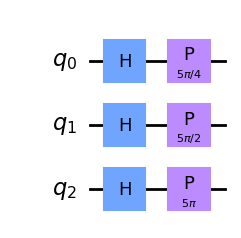

In [31]:
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw('mpl')

And we can see this does indeed result in the Fourier state
:$|\tilde 5⟩$

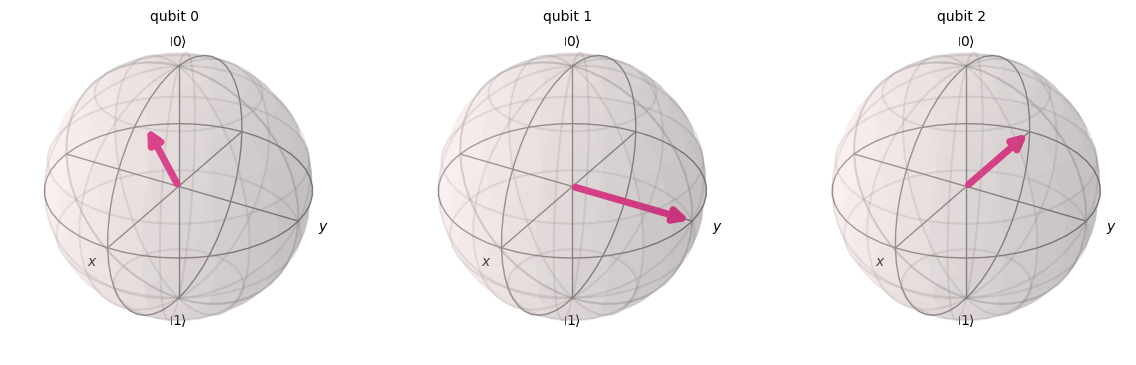

In [32]:
qc_init = qc.copy()
qc_init.save_statevector()
sim = Aer.get_backend("aer_simulator")
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

Finally, let's apply our inverse QFT:

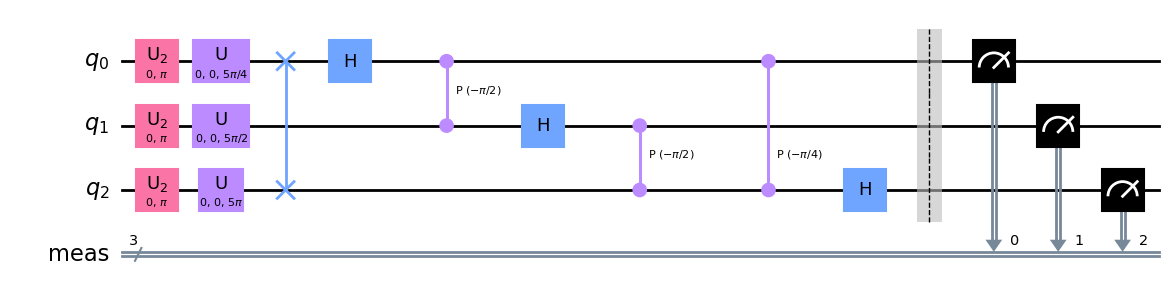

In [33]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

In [34]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits
                                       and not x.configuration().simulator
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibm_perth


In [35]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

Job Status: job has successfully run


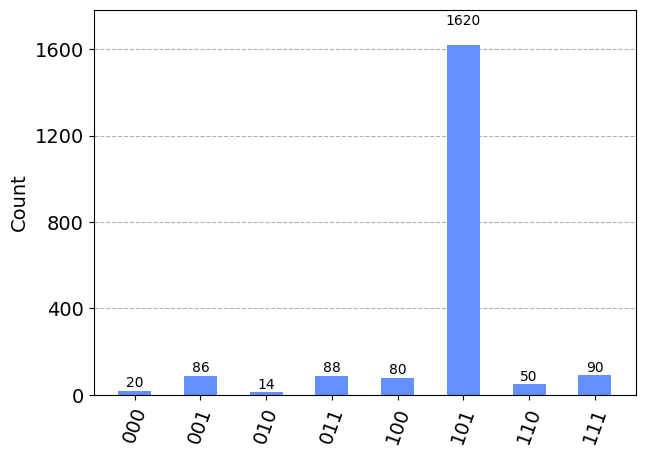

In [36]:
counts = job.result().get_counts()
plot_histogram(counts)

We see that the highest probability outcome is 101.

Check the entire blog series : Learn Quantum Computing with Qiskit

or visit my website for more such learning resources :

[The Quantum Classroom](https://monitsharma.github.io/)